In [1]:
import pandas as pd
import numpy as np
import shutil
import os
from PIL import Image

In [30]:
3272-654

2618

In [28]:
shutil.copytree('/opt/ml/input/data/mmseg/annotations/split1_train_MultiStfKFold','/opt/ml/input/data/mmseg/annotations/split1_train_MultiStfKFold_pseudo')

# for f in os.listdir('/opt/ml/input/data/mmseg/annotations/train_MultiStfKFold_pseudo'):
#     print(f)
print(len(os.listdir('/opt/ml/input/data/mmseg/annotations/split1_train_MultiStfKFold_pseudo')))

2618


In [29]:
shutil.copytree('/opt/ml/input/data/mmseg/images/split1_train_MultiStfKFold','/opt/ml/input/data/mmseg/images/split1_train_MultiStfKFold_pseudo')

# for f in os.listdir('/opt/ml/input/data/mmseg/images/train_pseudo2'):
#     print(f)
print(len(os.listdir('/opt/ml/input/data/mmseg/images/split1_train_MultiStfKFold_pseudo')))

2618


In [31]:
df = pd.read_csv('/opt/ml/input/mmsegmentation/work_dirs/base_split2_pseudo/swinL_uper_defaultaug_split2_pseudo_submission_best_mIoU_epoch_67.csv') # 가장 예측이 잘 된 csv를 넣습니다.
data_path = '/opt/ml/input/data'

# img_path = '/opt/ml/input/data/mmseg/images/train_MultiStfKFold/'
# annotation_path = '/opt/ml/input/data/mmseg/annotations/train_MultiStfKFold/'

# print(len(os.listdir(img_path)))
# print(len(os.listdir(annotation_path)))

new_img_id = 3272 # 새로운 image,annotation의 시작 번호, 기존에 3272장 이었으니까 3272

In [32]:
for i in range(len(df)):
    img = os.path.join(data_path,df.iloc[i,:]['image_id']) # csv 파일의 image 이름
    new_img = os.path.join('/opt/ml/input/data/mmseg/images/split1_train_MultiStfKFold_pseudo',str(new_img_id+i).zfill(4)+'.jpg') # pseudo_train에 저장될 image 이름.
    shutil.copyfile(img,new_img) # 파일을 복사하여 new_img의 이름으로 pseudo_trian에 저장합니다.

    arr = np.array(df.iloc[i,:]['PredictionString'].split()).reshape(256,256) # 256 사이즈에 맞게 정렬합니다.
    mask = Image.fromarray(np.uint8(arr)) 
    mask = mask.resize((512,512),Image.LANCZOS)
    new_annotation = os.path.join('/opt/ml/input/data/mmseg/annotations/split1_train_MultiStfKFold_pseudo',str(new_img_id+i).zfill(4)+'.png') # psseudo_train에 저장될 annotation 이름.
    mask.save(new_annotation) 

/tmp/ipykernel_8709/697965241.py:8: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  mask = mask.resize((512,512),Image.LANCZOS)


In [33]:
train_pseudo_path = '/opt/ml/input/data/mmseg/images/split1_train_MultiStfKFold_pseudo'

print(len(os.listdir(train_pseudo_path)))

3437


In [34]:
2618+819

3437

# 여기까지 pseudo-----------------------------------------------

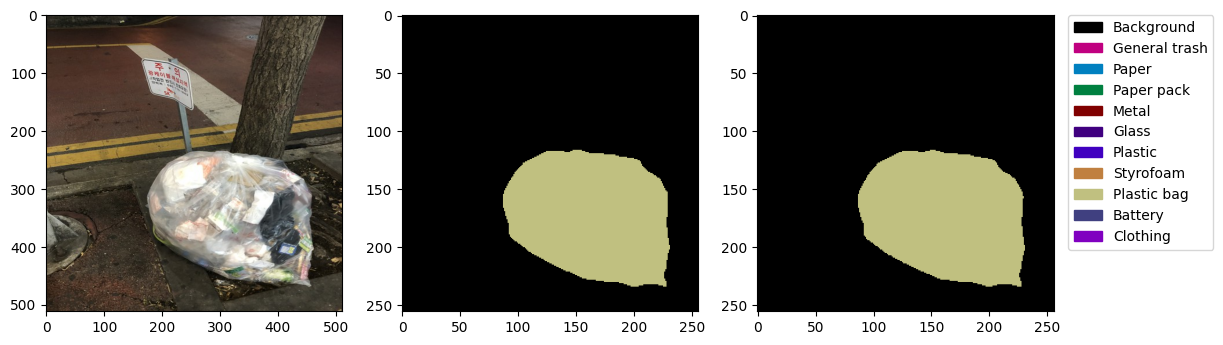

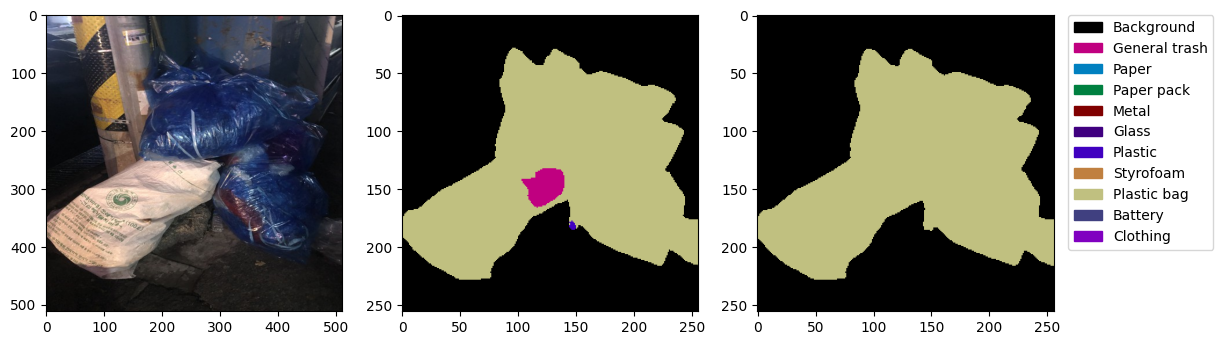

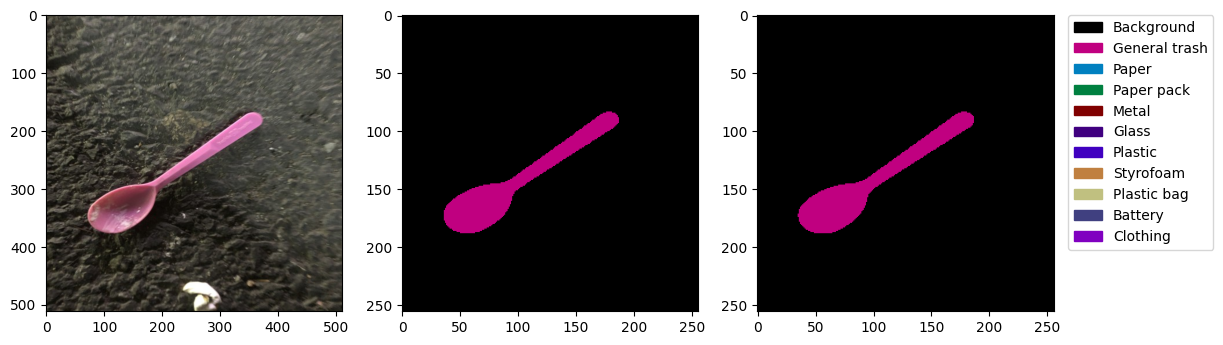

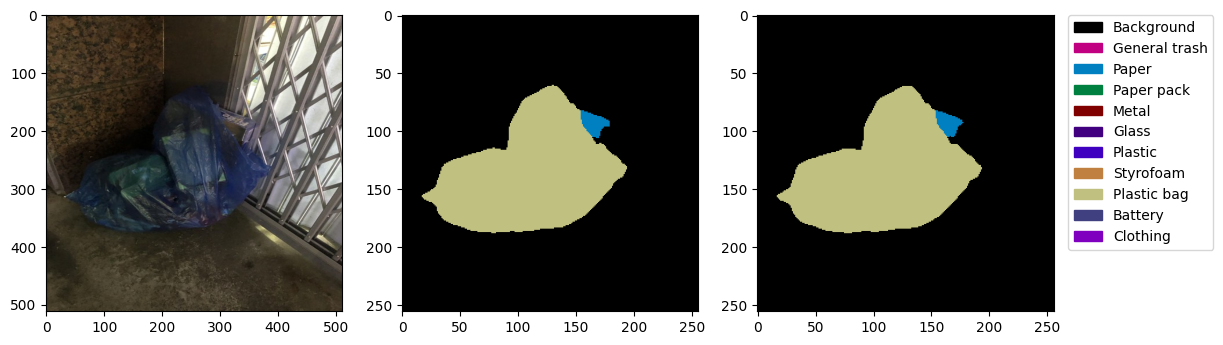

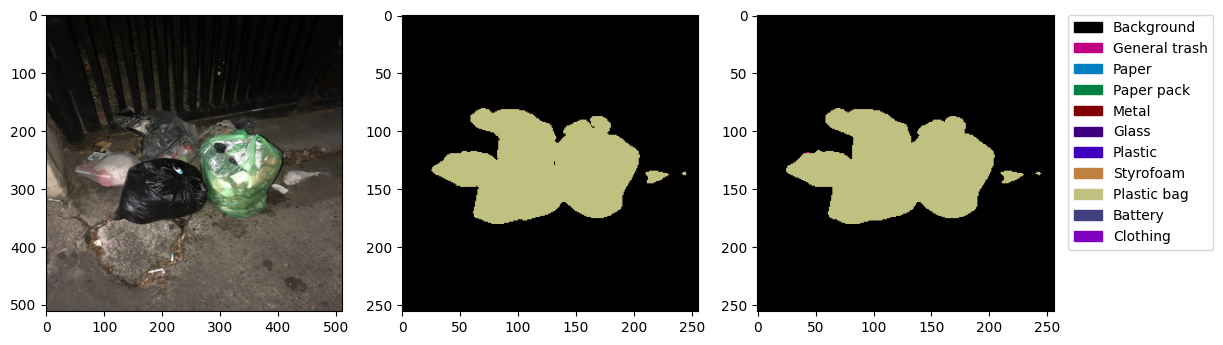

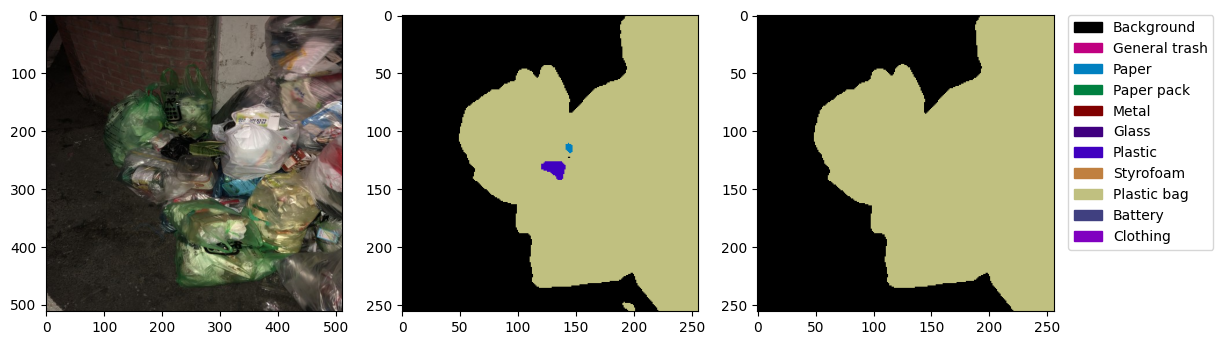

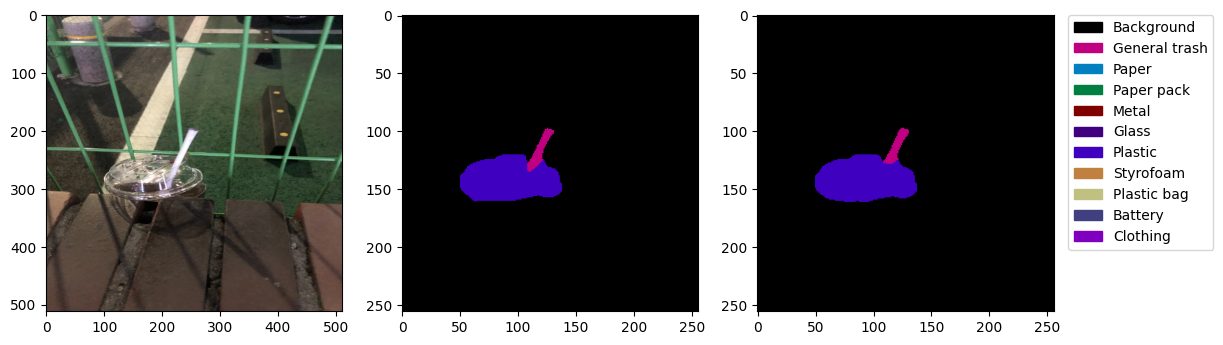

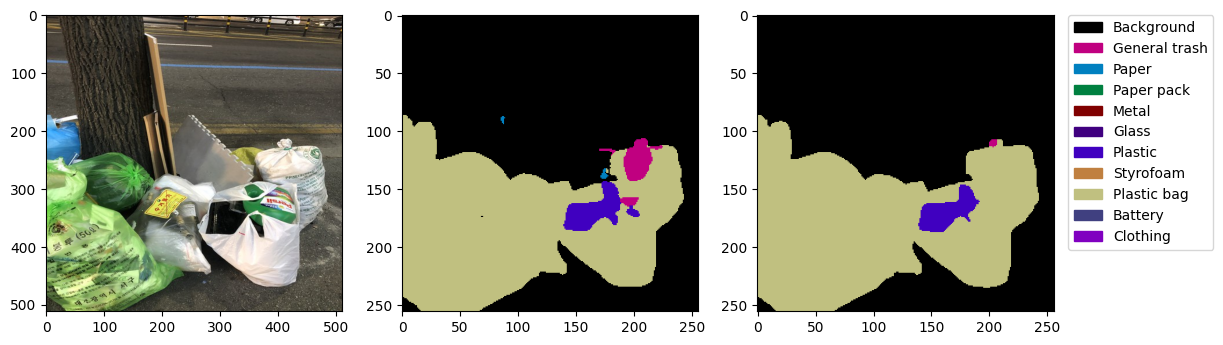

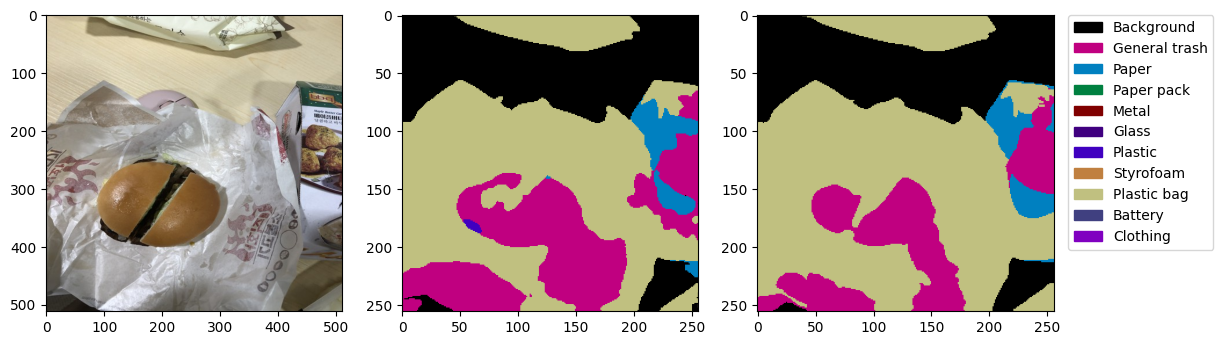

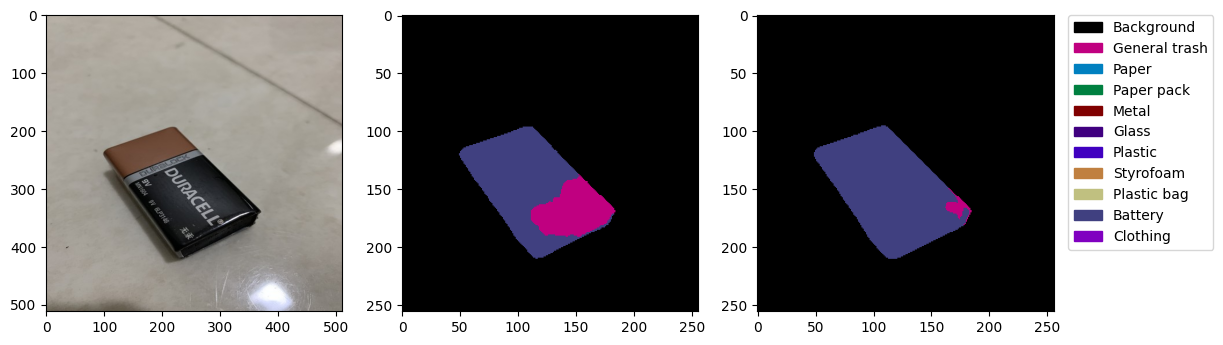

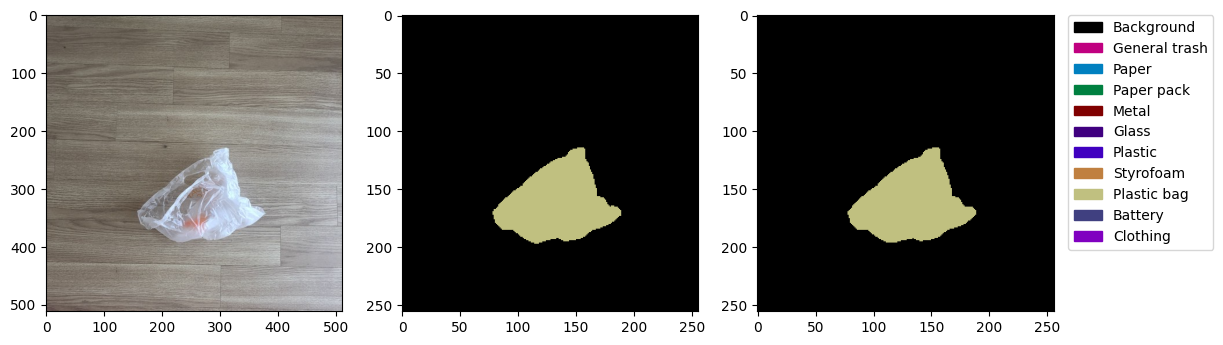

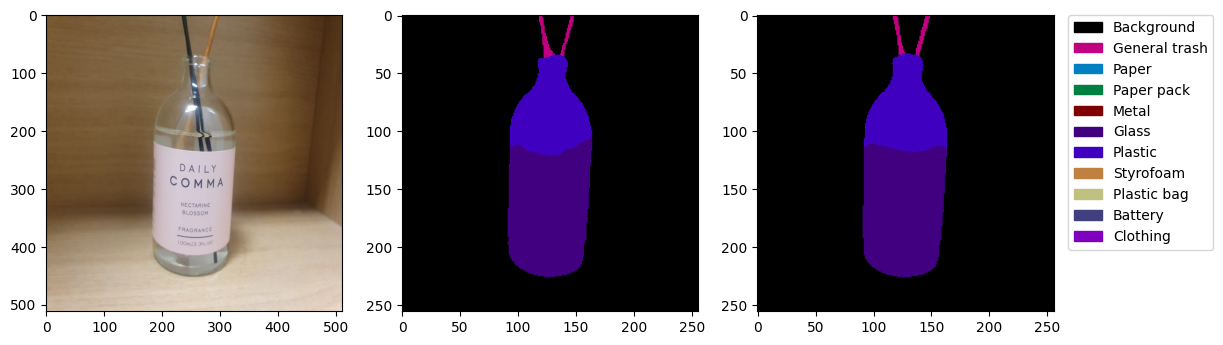

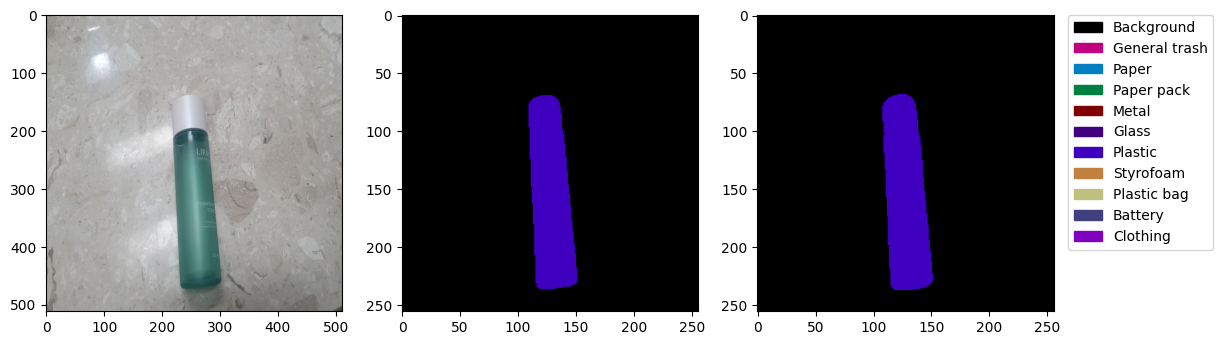

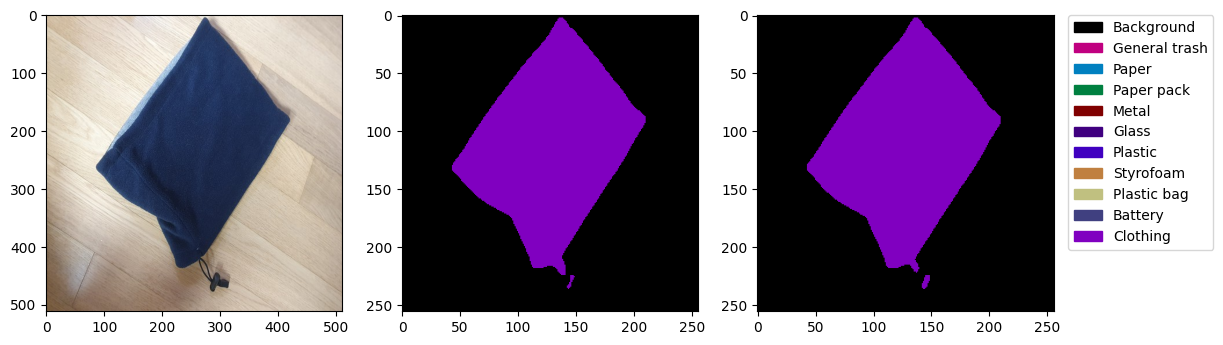

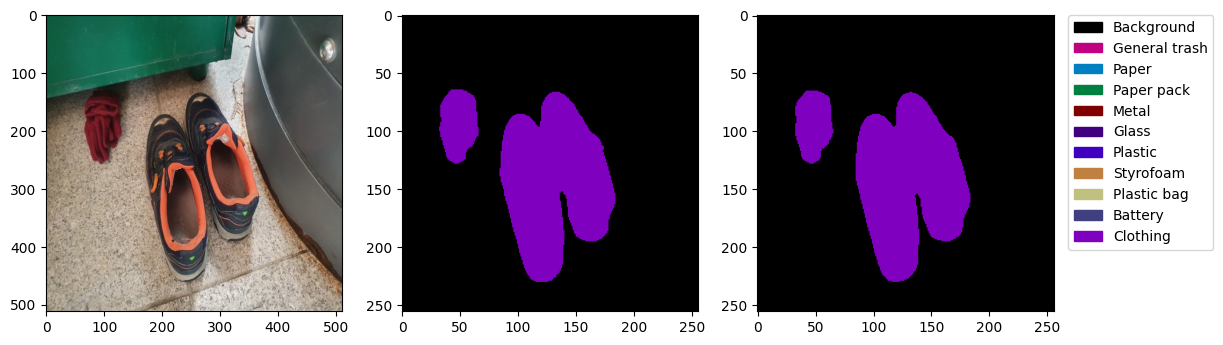

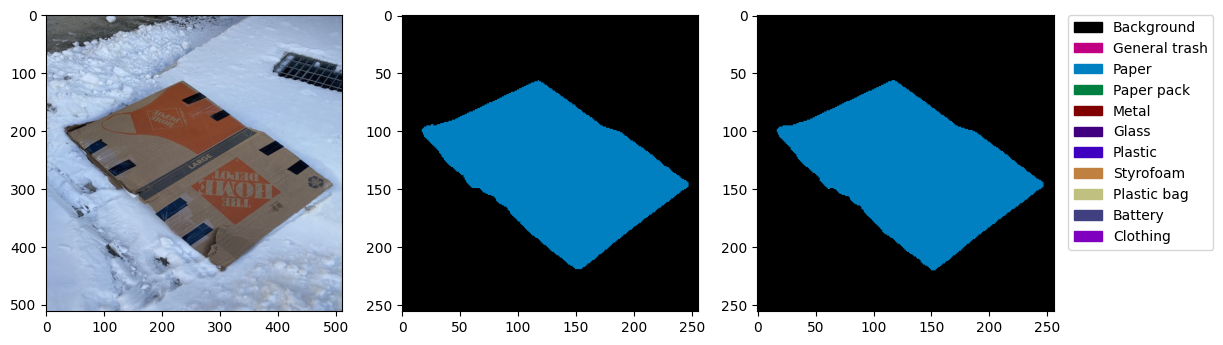

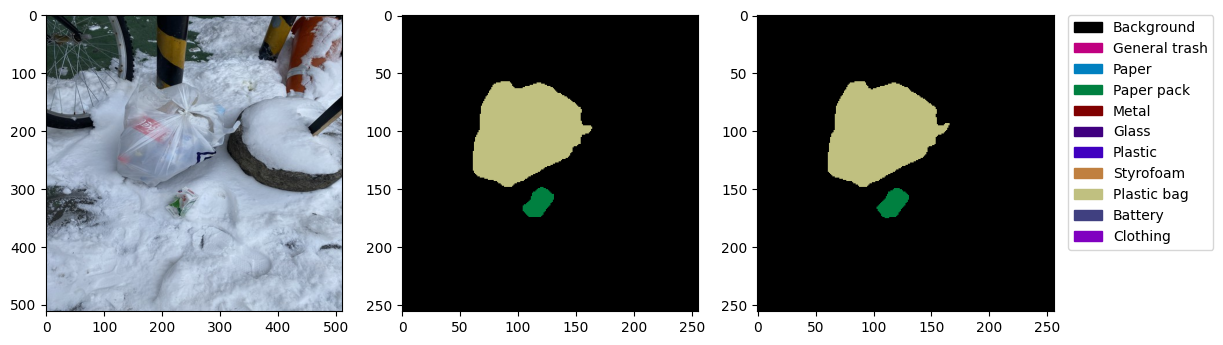

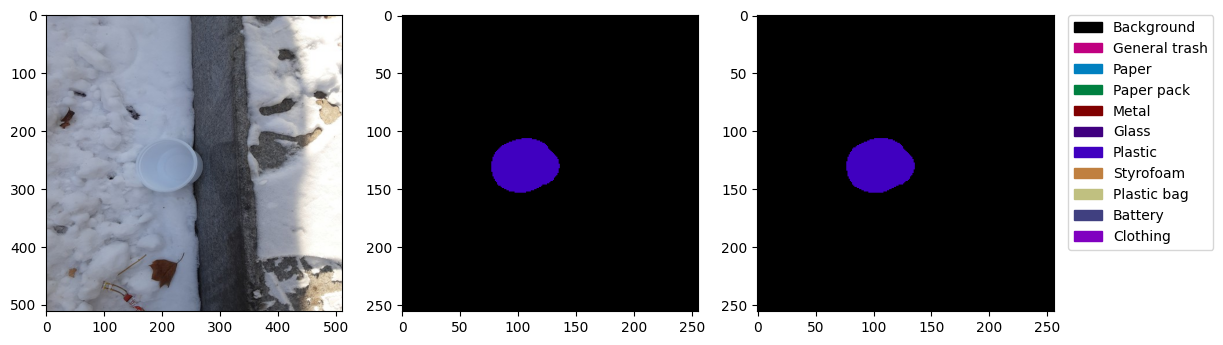

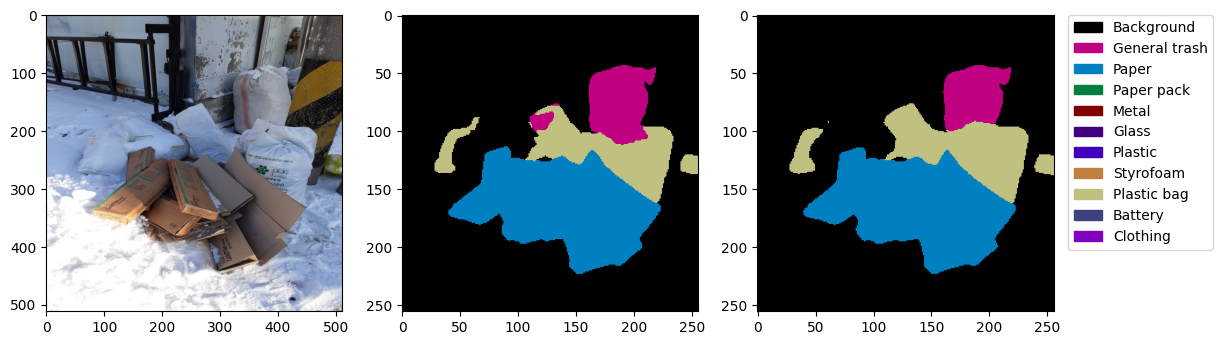

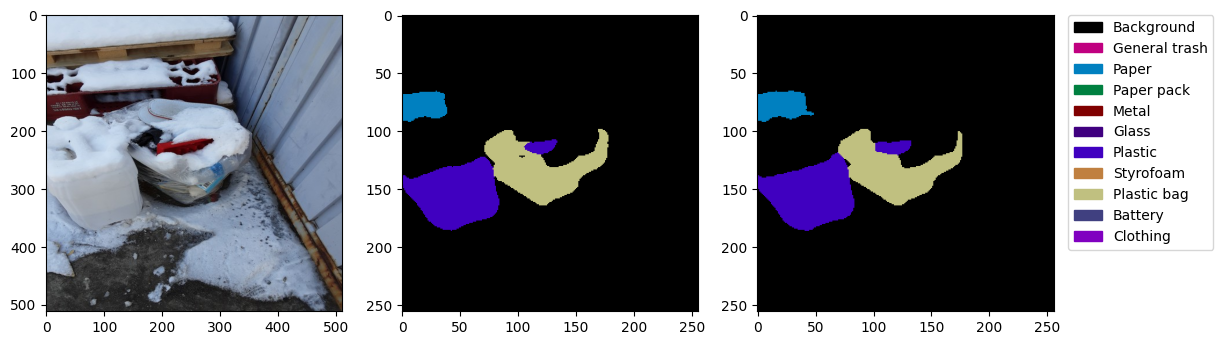

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Patch
import webcolors
import os

classes = ['Background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic','Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
palette = [
    [0, 0, 0],
    [192, 0, 128], [0, 128, 192], [0, 128, 64],
    [128, 0, 0], [64, 0, 128], [64, 0, 192],
    [192, 128, 64], [192, 192, 128], [64, 64, 128], [128, 0, 192]
]

img_dir = '../data' # 이미지 경로 (mmseg용이 아닌 원래 이미지 경로)
csv_dir = '/opt/ml/input/mmsegmentation/work_dirs/upernet_convnext_xlarge/best0.75_pseudo1.csv'
csv_dir1 = '/opt/ml/input/mmsegmentation/work_dirs/upernet_convnext_xlarge/submission_epoch_40_pseudo2.csv'
result = pd.read_csv(csv_dir)
result1 = pd.read_csv(csv_dir1)

category_and_rgb = [[classes[i], palette[i]] for i in range(11)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                         edgecolor=webcolors.rgb_to_hex(rgb), 
                         label=category) for category, rgb in category_and_rgb]

for idx in range(20): # 한 번에 최대로 load 할 수 있는 개수가 20개
    img_file = result['image_id'][idx]
    img_path = img_dir + '/' + img_file

    
    test_img = cv2.imread(img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB).astype(np.uint8)

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 13))
    pred = np.array(result['PredictionString'][idx].split()).reshape(256, -1)
    pred_1 = np.array(result1['PredictionString'][idx].split()).reshape(256, -1)
    img_1 = np.zeros((256,256,3))
    img = np.zeros((256, 256, 3))
    for i in range(pred_1.shape[0]):
        for j in range(pred_1.shape[1]):
            img_1[i][j][0] = palette[int(pred_1[i][j])][0]
            img_1[i][j][1] = palette[int(pred_1[i][j])][1]
            img_1[i][j][2] = palette[int(pred_1[i][j])][2]
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            img[i][j][0] = palette[int(pred[i][j])][0]
            img[i][j][1] = palette[int(pred[i][j])][1]
            img[i][j][2] = palette[int(pred[i][j])][2]

    axes[0].imshow(test_img) # 원본
    axes[1].imshow(img.astype(np.uint8)
    axes[2].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    axes[2].imshow(img_1.astype(np.uint8)) 

In [ ]:
2617 + 